<a href="https://colab.research.google.com/github/willygru/nn-from-scratch/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loss after iteration 0: 0.655452876138221
Loss after iteration 1000: 0.06927449501374952
Loss after iteration 2000: 0.07156104280744555
Loss after iteration 3000: 0.07074861533493895
Loss after iteration 4000: 0.0707501410843823
Loss after iteration 5000: 0.0707534008117854
Loss after iteration 6000: 0.0707559306876537
Loss after iteration 7000: 0.07075752882764672
Loss after iteration 8000: 0.07075842058885096
Loss after iteration 9000: 0.07075885011147554
Loss after iteration 10000: 0.07075899968050481
Loss after iteration 11000: 0.07075899057104099
Loss after iteration 12000: 0.07075889896565327
Loss after iteration 13000: 0.07075877074582648
Loss after iteration 14000: 0.07075863236783846
Loss after iteration 15000: 0.07075849822783985
Loss after iteration 16000: 0.07075837544629494
Loss after iteration 17000: 0.07075826689188296
Loss after iteration 18000: 0.07075817305034614
Loss after iteration 19000: 0.07075809315466351


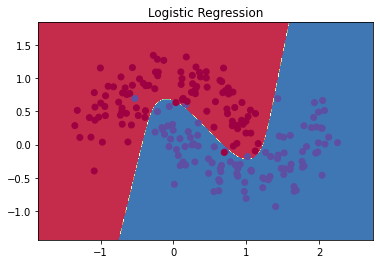

In [ ]:
__author__ = "wgruintal"
import numpy as np
from sklearn import datasets, linear_model
# from sklearn.datasets import make_moons # try commenting this!!!
# from sklearn.linear_model import LogisticRegressionCV  # try commenting this!!!
import matplotlib.pyplot as plt

class Config:
    # num_examples = len(X) #training test size
    nn_input_dim = 2 #input layer dimensionality
    nn_output_dim = 2 #output layer dimensionality

    #Gradient descent parameters
    epsilon = 0.01 # learning rate for gradient descent
    reg_lambda = 0.01  # regularization strength
# from sklearn.datasets import make_moons

# plt.figure(figsize=(5, 3))

def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    # X, y = make_moons(200, noise = 0.20)
    return X, y
def visualize(X, y, model):
  # plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral);
  # plt.show()
  plot_decision_boundary(lambda x: predict(model, x), X, y)
  plt.title("Logistic Regression")
  plt.show()
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    # plt.show()
#Helper function to calculate the loss on the dataset
def calculate_loss(model, X, y):
  num_examples = len(X)  # training set size
  W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
  # Forward propagation to calculate our predictions
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  # Calculating the loss
  corect_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(corect_logprobs)
  # Add regularization term to loss
  data_loss += Config.reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
  return 1. / num_examples * data_loss
# Helper function to predict an output (0 or 1)
def predict (model, x):
  W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
  # Forward propagation
  z1 = x.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  return np.argmax(probs, axis = 1)
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations

def build_model(X, y, nn_hdim, num_passes=20000, print_loss=False):

  # Initialize the parameters to random values. We need to learn these.
  num_examples = len(X)
  # print(len(X))
  W1 = np.random.rand(Config.nn_input_dim, nn_hdim) / np.sqrt(Config.nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.rand(nn_hdim, Config.nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, Config.nn_output_dim))

  # This is what we return at the end
  model = {}

  # Gradient descent. For each batch...  
  for i in range(0, num_passes):

    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims= True)

    # Backpropagation
    delta3 = probs
    delta3[range(num_examples), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)

    # Add regularization terms (b1 and b2 don't have regularization terms)
    dW2 += Config.reg_lambda * W2
    dW1 += Config.reg_lambda * W1

    # Gradient descent parameter update
    W1 += -Config.epsilon * dW1 
    b1 += -Config.epsilon * db1
    W2 += -Config.epsilon * dW2
    b2 += -Config.epsilon * db2

    # Assign new parameters to the model
    model = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
     
    # Optionally print the loss.
    # This is expensive because it uses the whole dataset, so we don't want to do it too often.
    if print_loss and i % 1000 == 0:
      print(f"Loss after iteration {i}: {calculate_loss(model, X, y)}")

  return model
def main():
# Build a model with a 3-dimensional hidden layer
  X, y = generate_data()
  model = build_model(X, y, 3, print_loss=True)
  visualize(X, y, model)
if __name__ == "__main__":
  main()